In [2]:
from pulp import *
import numpy as np
import pandas as pd
import re 
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data/books_good_reads.csv')
df.head()

,Title,Authors,Avg_rating,pages_number,ratings_count
0,A Walk to Remember,Nicholas Sparks,4.16,240,555926
1,Quiet: The Power of Introverts in a World That...,Susan Cain,4.06,333,277646
2,Judge & Jury,James Patterson-Andrew Gross,3.99,419,40897
3,Factfulness : ten reasons we're wrong about th...,"Hans Rosling, Ola Rosling, Anna Rosling Rönnlund",4.36,342,59967
4,The Complete I Ching: The Definitive Translation,Anonymous-Alfred Huang,4.27,539,319


In [4]:
df['ratings_count'] = df['ratings_count'].apply(lambda text: text.strip().replace(',',''))
df['ratings_count'] = pd.to_numeric(df['ratings_count'])

C:\Users\Sudipta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ratings_count', ylabel='Title'>

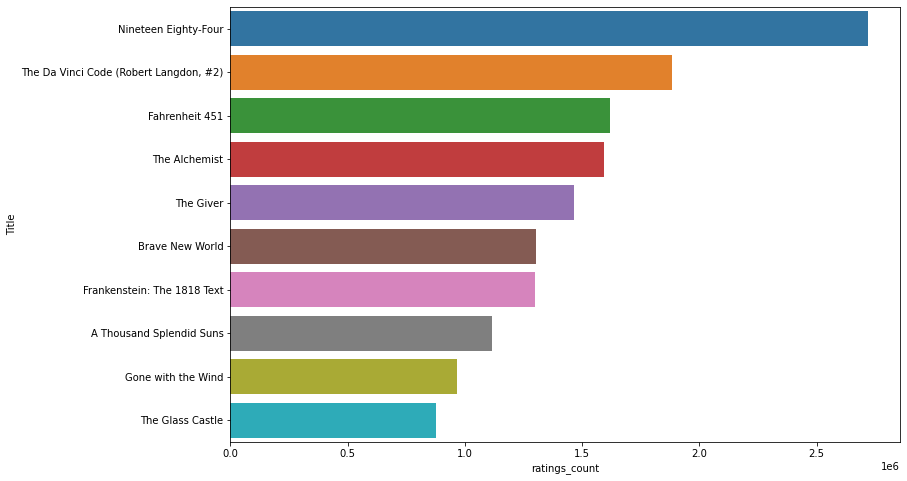

In [5]:
most_rated = df.sort_values('ratings_count', ascending = False).head(10).set_index('Title')
plt.figure(figsize=(12,8))
sns.barplot(most_rated['ratings_count'], most_rated.index)

In [6]:
# create the LP object, set up as a maximization problem --> since we want to maximize the number of books we read in a year
prob = LpProblem('Selectedbooks', LpMaximize)

In [7]:
decision_variables = []
for rownum, row in df.iterrows():
	variable = str('x' + str(rownum))
	variable = LpVariable(str(variable), lowBound = 0, upBound = 1, cat= 'Integer') #make variables binary
	decision_variables.append(variable)

print ("Total number of decision_variables: " + str(len(decision_variables)))

Total number of decision_variables: 100


In [8]:
#create optimization function
total_books = ""
for i, book in enumerate(decision_variables):
	total_books += book

prob += total_books
print ("Optimization function: " + str(total_books))	

Optimization function: x0 + x1 + x10 + x11 + x12 + x13 + x14 + x15 + x16 + x17 + x18 + x19 + x2 + x20 + x21 + x22 + x23 + x24 + x25 + x26 + x27 + x28 + x29 + x3 + x30 + x31 + x32 + x33 + x34 + x35 + x36 + x37 + x38 + x39 + x4 + x40 + x41 + x42 + x43 + x44 + x45 + x46 + x47 + x48 + x49 + x5 + x50 + x51 + x52 + x53 + x54 + x55 + x56 + x57 + x58 + x59 + x6 + x60 + x61 + x62 + x63 + x64 + x65 + x66 + x67 + x68 + x69 + x7 + x70 + x71 + x72 + x73 + x74 + x75 + x76 + x77 + x78 + x79 + x8 + x80 + x81 + x82 + x83 + x84 + x85 + x86 + x87 + x88 + x89 + x9 + x90 + x91 + x92 + x93 + x94 + x95 + x96 + x97 + x98 + x99


Example of the optimization problem. Given a reading habbit
to read maximum amount of books in a year,
which books should I choose to read?

Here is an example of my reading habbit
- Per week reading hours = 9 hours/week. 
- Reading pages per hour = 38
- Number of weeks avaliable for reading = 48


In [9]:
hours_week_read = 9
pages_per_hour = 38

In [10]:
#create constrains - there are only 365 days

total_pages_needs_to_read = ""
for rownum, row in df.iterrows():
	for i, schedule in enumerate(decision_variables):
		if rownum == i:
			formula = row['pages_number']*schedule
			total_pages_needs_to_read += formula

total_pages_can_read = 48*hours_week_read*pages_per_hour

prob += (total_pages_needs_to_read == total_pages_can_read)

In [11]:
print (prob)
prob.writeLP("Booksreading.lp" )

Selectedbooks:
MAXIMIZE
1*x0 + 1*x1 + 1*x10 + 1*x11 + 1*x12 + 1*x13 + 1*x14 + 1*x15 + 1*x16 + 1*x17 + 1*x18 + 1*x19 + 1*x2 + 1*x20 + 1*x21 + 1*x22 + 1*x23 + 1*x24 + 1*x25 + 1*x26 + 1*x27 + 1*x28 + 1*x29 + 1*x3 + 1*x30 + 1*x31 + 1*x32 + 1*x33 + 1*x34 + 1*x35 + 1*x36 + 1*x37 + 1*x38 + 1*x39 + 1*x4 + 1*x40 + 1*x41 + 1*x42 + 1*x43 + 1*x44 + 1*x45 + 1*x46 + 1*x47 + 1*x48 + 1*x49 + 1*x5 + 1*x50 + 1*x51 + 1*x52 + 1*x53 + 1*x54 + 1*x55 + 1*x56 + 1*x57 + 1*x58 + 1*x59 + 1*x6 + 1*x60 + 1*x61 + 1*x62 + 1*x63 + 1*x64 + 1*x65 + 1*x66 + 1*x67 + 1*x68 + 1*x69 + 1*x7 + 1*x70 + 1*x71 + 1*x72 + 1*x73 + 1*x74 + 1*x75 + 1*x76 + 1*x77 + 1*x78 + 1*x79 + 1*x8 + 1*x80 + 1*x81 + 1*x82 + 1*x83 + 1*x84 + 1*x85 + 1*x86 + 1*x87 + 1*x88 + 1*x89 + 1*x9 + 1*x90 + 1*x91 + 1*x92 + 1*x93 + 1*x94 + 1*x95 + 1*x96 + 1*x97 + 1*x98 + 1*x99 + 0
SUBJECT TO
_C1: 240 x0 + 333 x1 + 289 x10 + 534 x11 + 499 x12 + 417 x13 + 276 x14
 + 268 x15 + 1037 x16 + 144 x17 + 542 x18 + 500 x19 + 419 x2 + 451 x20
 + 420 x21 + 309 x22 + 288 x23 

[x0,
 x1,
 x10,
 x11,
 x12,
 x13,
 x14,
 x15,
 x16,
 x17,
 x18,
 x19,
 x2,
 x20,
 x21,
 x22,
 x23,
 x24,
 x25,
 x26,
 x27,
 x28,
 x29,
 x3,
 x30,
 x31,
 x32,
 x33,
 x34,
 x35,
 x36,
 x37,
 x38,
 x39,
 x4,
 x40,
 x41,
 x42,
 x43,
 x44,
 x45,
 x46,
 x47,
 x48,
 x49,
 x5,
 x50,
 x51,
 x52,
 x53,
 x54,
 x55,
 x56,
 x57,
 x58,
 x59,
 x6,
 x60,
 x61,
 x62,
 x63,
 x64,
 x65,
 x66,
 x67,
 x68,
 x69,
 x7,
 x70,
 x71,
 x72,
 x73,
 x74,
 x75,
 x76,
 x77,
 x78,
 x79,
 x8,
 x80,
 x81,
 x82,
 x83,
 x84,
 x85,
 x86,
 x87,
 x88,
 x89,
 x9,
 x90,
 x91,
 x92,
 x93,
 x94,
 x95,
 x96,
 x97,
 x98,
 x99]

In [12]:
# run optimization
optimization_result = prob.solve()
assert optimization_result == LpStatusOptimal
print("Status:", LpStatus[prob.status])
# print("Optimal Solution to the problem: ", value(prob.objective))
print ("Individual decision_variables: ")
for v in prob.variables():
	print(v.name, "=", v.varValue)

Status: Optimal
Individual decision_variables: 
x0 = 1.0
x1 = 1.0
x10 = 1.0
x11 = 0.0
x12 = 0.0
x13 = 0.0
x14 = 1.0
x15 = 1.0
x16 = 0.0
x17 = 1.0
x18 = 0.0
x19 = 0.0
x2 = 0.0
x20 = 0.0
x21 = 0.0
x22 = 1.0
x23 = 1.0
x24 = 1.0
x25 = 1.0
x26 = 1.0
x27 = 1.0
x28 = 0.0
x29 = 1.0
x3 = 1.0
x30 = 0.0
x31 = 1.0
x32 = 1.0
x33 = 1.0
x34 = 1.0
x35 = 1.0
x36 = 1.0
x37 = 0.0
x38 = 0.0
x39 = 1.0
x4 = 0.0
x40 = 1.0
x41 = 0.0
x42 = 1.0
x43 = 1.0
x44 = 1.0
x45 = 0.0
x46 = 1.0
x47 = 1.0
x48 = 1.0
x49 = 0.0
x5 = 1.0
x50 = 0.0
x51 = 1.0
x52 = 0.0
x53 = 1.0
x54 = 1.0
x55 = 1.0
x56 = 1.0
x57 = 1.0
x58 = 1.0
x59 = 1.0
x6 = 1.0
x60 = 0.0
x61 = 0.0
x62 = 1.0
x63 = 1.0
x64 = 1.0
x65 = 1.0
x66 = 1.0
x67 = 0.0
x68 = 1.0
x69 = 1.0
x7 = 1.0
x70 = 1.0
x71 = 0.0
x72 = 1.0
x73 = 0.0
x74 = 1.0
x75 = 0.0
x76 = 1.0
x77 = 0.0
x78 = 1.0
x79 = 1.0
x8 = 1.0
x80 = 1.0
x81 = 0.0
x82 = 1.0
x83 = 0.0
x84 = 0.0
x85 = 1.0
x86 = 1.0
x87 = 1.0
x88 = 0.0
x89 = 1.0
x9 = 0.0
x90 = 1.0
x91 = 1.0
x92 = 1.0
x93 = 1.0
x94 = 1.0
x95 = 0.0
x9

In [14]:
#reorder results
variable_name = []
variable_value = []
for v in prob.variables():
	variable_name.append(v.name)
	variable_value.append(v.varValue)

data = pd.DataFrame({'variable': variable_name, 'value': variable_value})
for rownum, row in data.iterrows():
	value = re.findall(r'(\d+)', row['variable'])
	data.loc[rownum, 'variable'] = int(value[0])

data = data.sort_values(by='variable')

#append results
for rownum, row in df.iterrows():
	for results_rownum, results_row in data.iterrows():
		if rownum == results_row['variable']:
			df.loc[rownum, 'decision'] = results_row['value']

In [15]:
df[df['decision'] == 1]

,Title,Authors,Avg_rating,pages_number,ratings_count,decision
0,A Walk to Remember,Nicholas Sparks,4.16,240,555926,1.0
1,Quiet: The Power of Introverts in a World That...,Susan Cain,4.06,333,277646,1.0
3,Factfulness : ten reasons we're wrong about th...,"Hans Rosling, Ola Rosling, Anna Rosling Rönnlund",4.36,342,59967,1.0
5,Bad Blood: Secrets and Lies in a Silicon Valle...,John Carreyrou,4.34,353,149582,1.0
6,The Paradox of Choice : Why More is Less,Barry Schwartz,4.03,265,26736,1.0
...,...,...,...,...,...,...
91,The Hound of the Baskervilles,Arthur Conan Doyle-Pam Smy,4.10,272,61,1.0
92,Star Wars: The New Essential Guide to Vehicle...,W. Haden Blackman-Ian Fullwood,4.10,200,203,1.0
93,Number the Stars,Lois Lowry,4.14,240,403329,1.0
94,The Namesake,Jhumpa Lahiri,3.98,291,221471,1.0


In [17]:
len(df[df['decision'] == 1])

65